<a href="https://colab.research.google.com/github/HariSudhan76/DataVisualization/blob/Matplotlib/MatplotlibBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Line Charts**

In [24]:
inventory = pd.read_csv("housing_data.csv")


<ipython-input-139-b9fcf3ebfa27>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inv_monthly = inv_monthly.resample("M").sum()/100000


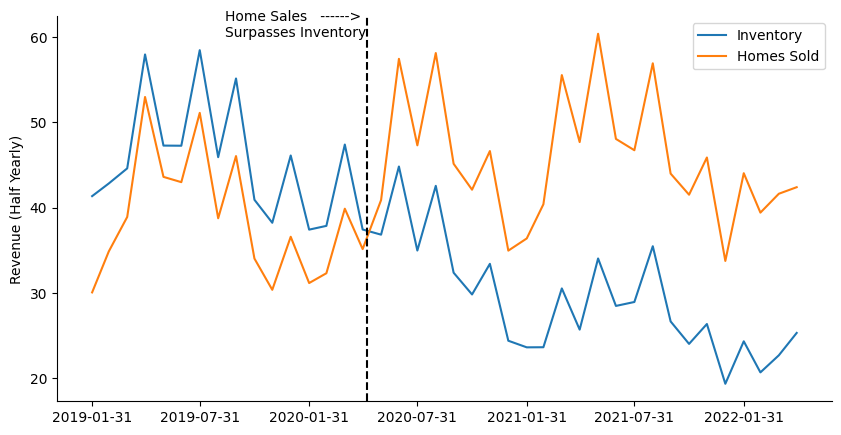

In [139]:
#inv["startdate"]= pd.to_datetime(inventory["period_begin"])
housing = inventory.assign(period_begin=pd.to_datetime(inventory.period_begin))
inv = housing.groupby(by="period_begin")[[
    "inventory","total_homes_sold"
    ]].sum()
inv["startdate"] = inv.index.to_numpy().astype("datetime64[M]")
inv_monthly = inv[inv.index>='2019']
inv_monthly = inv_monthly.resample("M").sum()/100000
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(inv_monthly)
ax.set_ylabel("Revenue (Half Yearly)")
ax.set_xticks(inv_monthly.index[::6])
ax.legend(["Inventory","Homes Sold"])
ax.text(18150,60,"Home Sales   ------>\nSurpasses Inventory")
ax.axvline(18390,c="black",ls="--")
ax.spines[["right","top"]].set_visible(False)
plt.show()

# **Stacked Line Chart**

In [97]:
ca_housing = inventory[inventory["region_name"].str.contains("CA")].assign(region_name=inventory.region_name.str[0:-11])
ca_housing["period_begin"] = ca_housing["period_begin"].to_numpy().astype("datetime64[M]")
ca_housing = ca_housing.set_index("period_begin").sort_index()
ca_housing_pivot = (
    ca_housing.pivot_table(index = "period_begin",
                           columns = "region_name",
                           values = "median_active_list_price")
                          .assign(CA_Average = lambda x:round(x.mean(axis=1),2))
                          .loc[:,["Los Angeles","San Diego","San Francisco","CA_Average"]]

)



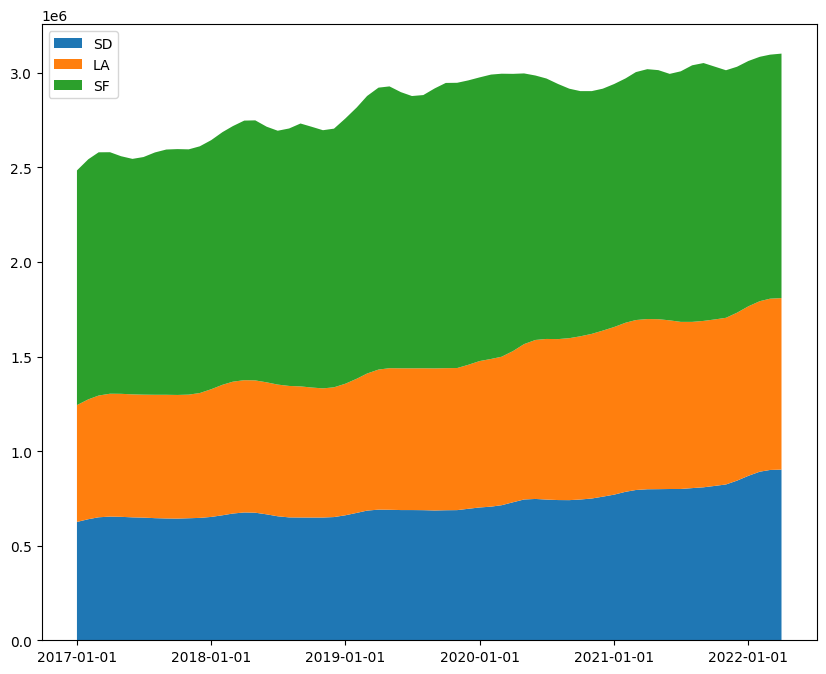

In [98]:
fig, ax  = plt.subplots(figsize = (10,8))
labels = ["SD", "LA", "SF"]
ax.stackplot(ca_housing_pivot.index,ca_housing_pivot["San Diego"]
             ,ca_housing_pivot["Los Angeles"],
             ca_housing_pivot["San Francisco"],
             labels = labels,
             cmap='Pastel2'
             )

ax.set_xticks(ca_housing_pivot.index[::12])
ax.legend(loc="upper left")
plt.show()


# **Dual Axis Chart**

When 2 plots do no fit with same Y-axis we can show 1 on the left side and other with the right side.

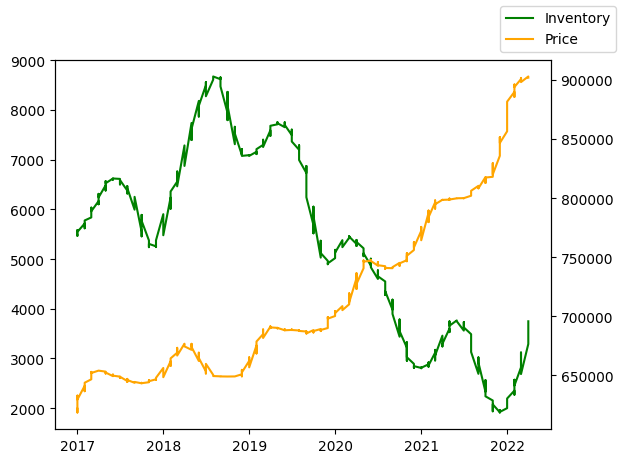

In [133]:
sd_dual = ca_housing.loc[ca_housing.region_name=="San Diego",["inventory","median_active_list_price"]]
fig, ax = plt.subplots()
ax.plot(sd_dual.inventory,c="green",label="Inventory")
ax1 = ax.twinx()
ax1.plot(sd_dual.median_active_list_price,c="orange",label="Price")
fig.legend()
plt.show()


# Dual Axis line chart

Plot sum of nights booked and sum of cancellations on a quarterly basis

In [141]:
hotel = pd.read_excel("HotelCustomersDataset.xlsx",index_col=0)
hotel.head()

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
3,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
5,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-182-7e29832f26c0>:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  - pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")


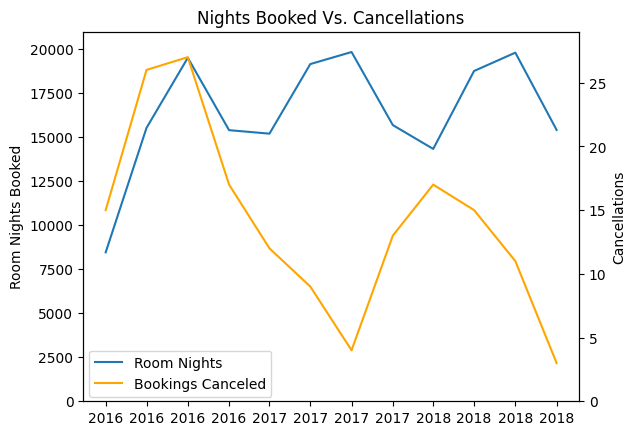

In [182]:
hotel["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotel["DaysSinceCreation"], unit="D")).astype("datetime64")
room_nights = hotel.groupby("date").agg({"RoomNights":"sum","BookingsCanceled":"sum"})
rm = room_nights.resample("Q").sum()
fig, ax = plt.subplots()
ax.plot(rm.RoomNights,label="Room Nights")
ax1 = ax.twinx()
ax.set_xticks(rm.index[::1])
ax1.plot(rm.BookingsCanceled,c="Orange",label="Bookings Canceled")
ax.set_ylabel("Room Nights Booked")
ax1.set_ylabel("Cancellations")
ax.set_ylim(0,21000)
ax1.set_ylim(0,29)
ax.set_title("Nights Booked Vs. Cancellations")
fig.legend(bbox_to_anchor =[.43,.23])
plt.show()

ID
1        150 days
2       1095 days
3       1095 days
4       1095 days
5       1095 days
           ...   
83586      0 days
83587      0 days
83588      0 days
83589      0 days
83590      0 days
Name: DaysSinceCreation, Length: 83590, dtype: timedelta64[ns]